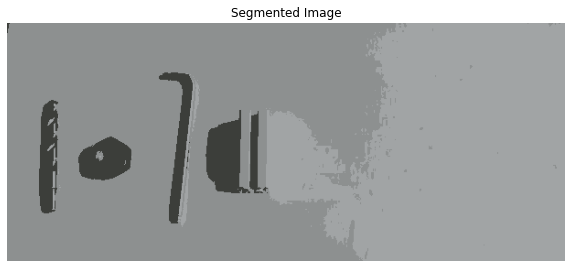

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the image
image = cv2.imread("image_001.jpg")
if image is None:
    print("Error: Could not open or read the image.")
else:
    # Crop the image
    cropped_image = image[150:410, 30:640]

    # Convert the image to RGB
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

    # Reshape the image into a 2D array of pixels (X is the dataset)
    X = cropped_image_rgb.reshape((-1, 3))  # Each row is a pixel (R, G, B)

# Function to initialize centroids randomly
def initialize_centroids(X, k):
    np.random.seed(0)  # For reproducibility
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

# Function to calculate clusters based on current centroids
def assign_clusters(X, centroids, k):
    clusters = {i: [] for i in range(k)}
    for idx, data in enumerate(X):
        distances = [np.linalg.norm(data - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(idx)  # Store index of the pixel
    return clusters

# Function to recalculate centroids
def recalculate_centroids(X, clusters, k):
    centroids = []
    for i in range(k):
        if clusters[i]:  # Avoid empty clusters
            centroids.append(np.mean(X[clusters[i]], axis=0))
        else:
            centroids.append(np.zeros(X.shape[1]))  # Default to zero for empty clusters
    return np.array(centroids)

# K-Means clustering implementation
def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids, k)
        new_centroids = recalculate_centroids(X, clusters, k)
        # Check for convergence (centroids don't change significantly)
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return clusters, centroids

# Run K-Means on the image data
k = 3
clusters, centroids = k_means(X, k)

# Create segmented image based on clusters
segmented_image = np.zeros_like(X)
for cluster_idx, pixel_indices in clusters.items():
    segmented_image[pixel_indices] = centroids[cluster_idx]

segmented_image = segmented_image.reshape(cropped_image.shape)

# Display the segmented image
plt.figure(figsize=(10, 5))
plt.imshow(segmented_image.astype(np.uint8))
plt.title("Segmented Image")
plt.axis("off")
plt.show()


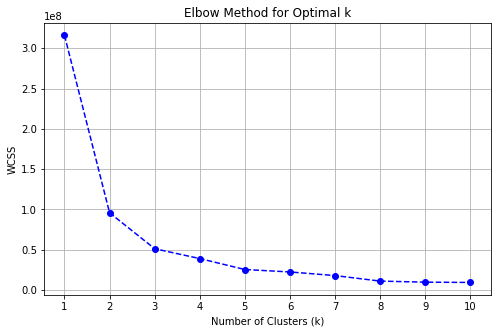

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate WCSS
def calculate_wcss(X, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        clusters, centroids = k_means(X, k)  # Use the previously implemented k_means
        wcss_k = 0
        for cluster_idx, pixel_indices in clusters.items():
            # Sum of squared distances to the centroid
            wcss_k += np.sum((X[pixel_indices] - centroids[cluster_idx])**2)
        wcss.append(wcss_k)
    return wcss

# Apply the elbow method to evaluate k
max_k = 10  # You can adjust this to test more cluster numbers
wcss = calculate_wcss(X, max_k)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.show()
